In [1]:
import pymc as pm, polars as pl
import matplotlib.pyplot as plt, numpy as np, xarray as xr
import arviz as az

In [2]:
df_foxes = pl.read_csv("../../Rethinking_2/End_of_chapter_problems/data/foxes.csv", separator=";")
df_foxes = df_foxes.with_columns((pl.exclude("group") - pl.exclude("group").mean())/pl.exclude("group").std())

In [4]:
# model definition
with pm.Model() as basic_model:
    # priors
    alpha = pm.Normal('alpha', 0, 1)
    beta = pm.Normal('beta', 0, 0.5)
    beta2 = pm.Normal('beta2', 0, 0.5)
    sigma = pm.Exponential('sigma', 1)

    mu = alpha + beta*df_foxes["avgfood"].to_numpy() + beta2*df_foxes["groupsize"].to_numpy()
    weight = pm.Normal('weight', mu, sigma, observed=df_foxes["weight"].to_numpy())

    # check prior predictive
    idata = pm.sample_prior_predictive(draws=100)

with basic_model:
    idata_posterior = pm.sample(draws=10000)

az.plot_trace(idata_posterior["posterior"])

Sampling: [alpha, beta, beta2, sigma, weight]


Sampling: [alpha, beta, beta2, beta3, sigma, weight]
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, beta2, beta3, sigma]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 5 seconds.


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>],
       [<Axes: title={'center': 'beta3'}>,
        <Axes: title={'center': 'beta3'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

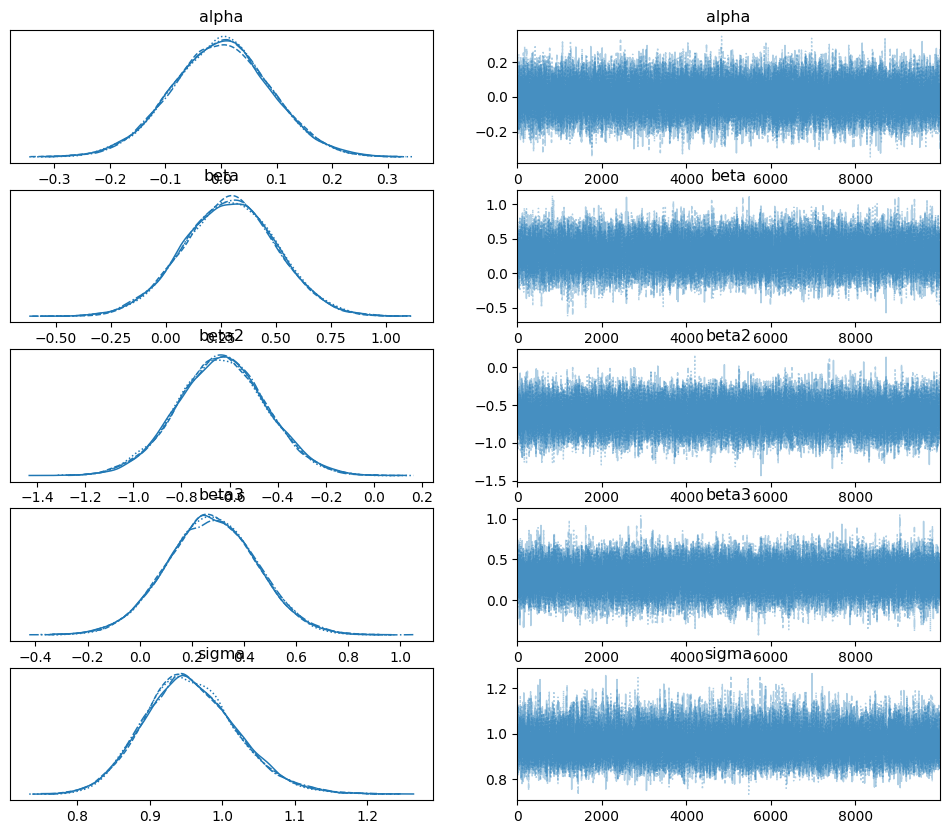

In [6]:
# model definition
with pm.Model() as basic_model2:
    # priors
    alpha = pm.Normal('alpha', 0, 1)
    beta = pm.Normal('beta', 0, 0.5)
    beta2 = pm.Normal('beta2', 0, 0.5)
    beta3 = pm.Normal('beta3', 0, 0.5)
    sigma = pm.Exponential('sigma', 1)

    mu = alpha + beta*df_foxes["avgfood"].to_numpy() + beta2*df_foxes["groupsize"].to_numpy() + beta3*df_foxes["area"].to_numpy()
    weight = pm.Normal('weight', mu, sigma, observed=df_foxes["weight"].to_numpy())

    # check prior predictive
    idata = pm.sample_prior_predictive(draws=100)

with basic_model2:
    idata_posterior = pm.sample(draws=10000)

az.plot_trace(idata_posterior["posterior"])